In [68]:
import os
import sys
from dotenv import load_dotenv

import rasterio
import rasterstats
from rasterio.plot import show
from rasterio import mask

import pandas as pd
import geopandas as gpd

In [1]:
sys.path.append("../src")

In [63]:
from main import agg_raster

In [8]:
load_dotenv()
data_dir = os.getenv("DATA_PATH")
file_path = os.path.join(data_dir, "processed_data/hiwn_200_many_params.csv")
df = pd.read_csv(file_path)

In [10]:
skv_path = 'merged_raster_no_overlap.tif'

In [54]:
bldgs = gpd.read_parquet('/Users/lisawink/Documents/paper1/data/processed_data/preprocessed_buildings_unfiltered.parquet')

In [56]:
bldgs = bldgs.to_crs(epsg=25832)

In [57]:
# buffer buildings by 2 m
bldgs['geometry'] = bldgs.buffer(2)


EPSG:25832


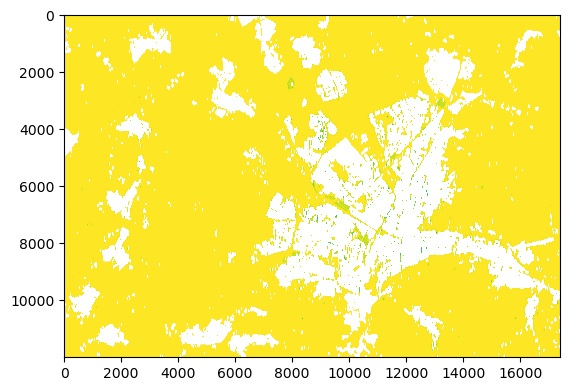

<Axes: >

In [58]:
with rasterio.open(skv_path) as src:
  print(src.crs)
  out_image, out_transform = mask.mask(src, bldgs.geometry, crop=False,invert=True,filled=False)

  # Define the metadata for the new file
  out_meta = src.meta.copy()
  out_meta.update({
      "driver": "GTiff",
      "height": out_image.shape[1],
      "width": out_image.shape[2],
      "transform": out_transform
  })
      
  # Save the raster file to a different path
  with rasterio.open('SVF_street_1.tif', 'w', **out_meta) as dest:
      dest.write(out_image)
show(out_image)

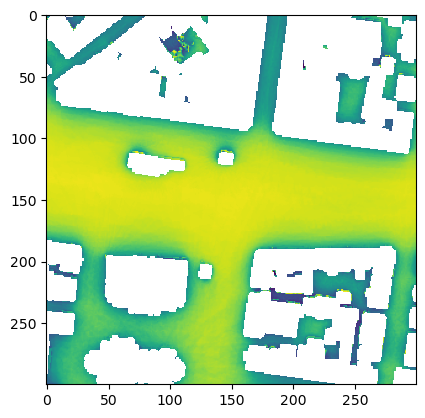

<Axes: >

In [59]:
show(out_image[0,7700:8000, 11700:12000])

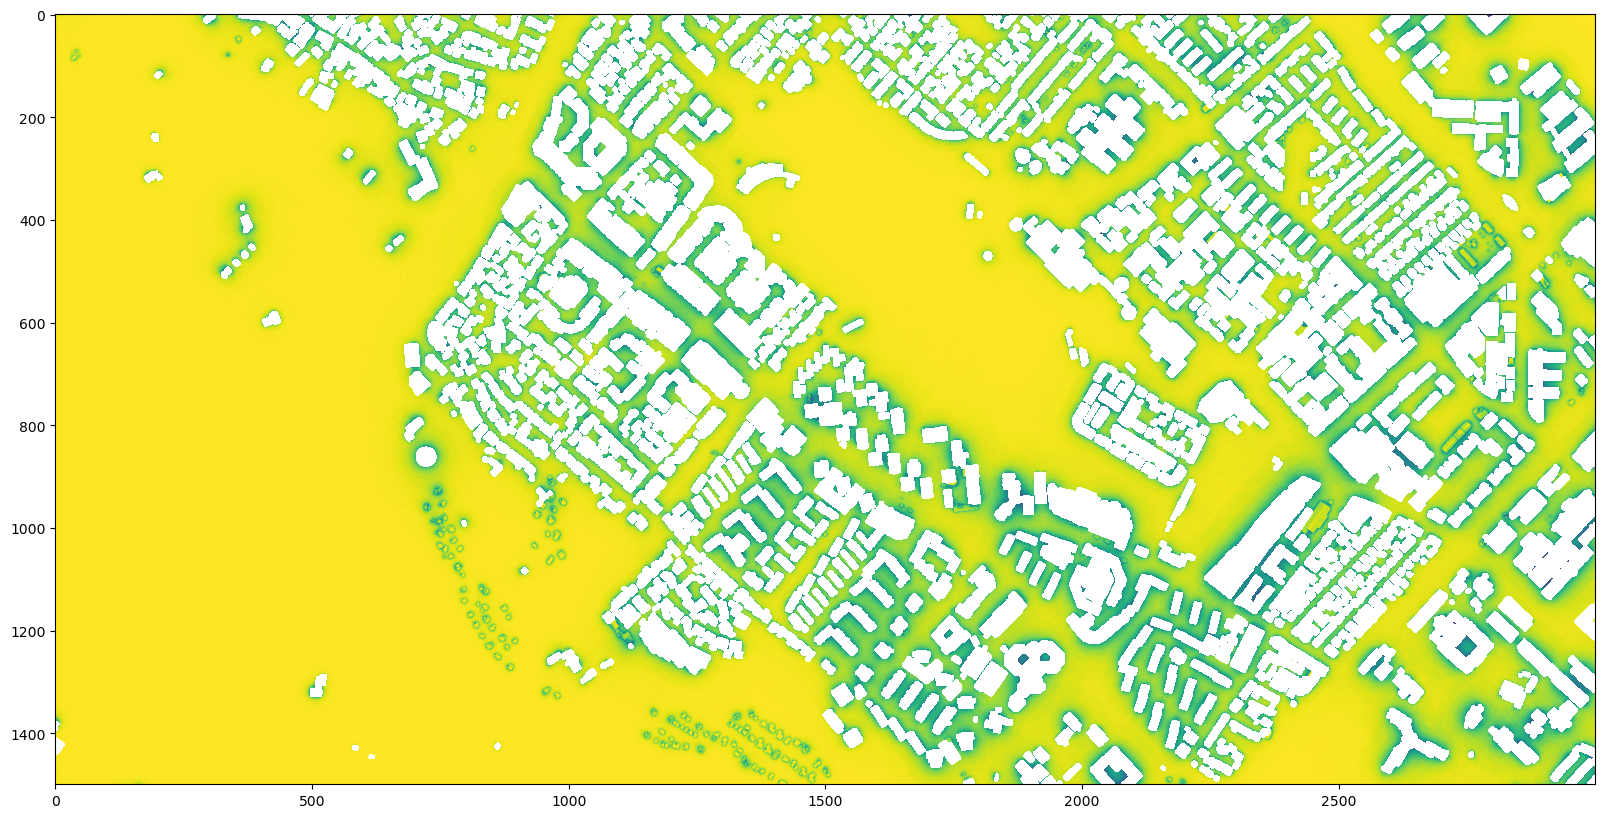

<Axes: >

In [60]:
# make figure size bigger
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
show(out_image[0,5000:6500,8000:11000])

In [61]:
from rasterstats import zonal_stats

In [62]:
raster_path = 'SVF_street_1.tif'

In [64]:
stn_buffers = gpd.read_parquet('/Users/lisawink/Documents/paper1/data/processed_data/processed_station_params_200.parquet')

In [65]:
masked_svf_path = '/Users/lisawink/Documents/paper1/data/processed_data/SVF_street_buildings_only.tif'
stn_buffers = agg_raster(masked_svf_path, stn_buffers, 'SVF_3D')

In [67]:
stn_buffers.explore(column='SVF_3D_mean')

In [15]:
stats = zonal_stats(stations_50, raster_path, stats=['mean', 'max', 'min', 'count', 'std', 'median', 'sum', 'range','percentile_25','percentile_75'])

In [17]:
parameter_name = 'SVF'

In [18]:
stations_50[parameter_name] = stats

stations_50[parameter_name+'_mean'] = stations_50[parameter_name].apply(lambda x: x['mean'])
stations_50[parameter_name+'_std'] = stations_50[parameter_name].apply(lambda x: x['std'])
stations_50[parameter_name+'_median'] = stations_50[parameter_name].apply(lambda x: x['median'])
stations_50[parameter_name+'_IQR'] = stations_50[parameter_name].apply(lambda x: x['percentile_75']) - stations_50[parameter_name].apply(lambda x: x['percentile_25'])


In [60]:
vars = gpd.read_parquet('/Users/lisawink/Documents/paper1/data/processed_data/processed_station_params_50.parquet')

In [61]:
vars

station_id  station_no                       station_name  \
0      FRASHA           1           Freiburg Alte Stadthalle   
1      FRBETZ           2              Freiburg Betzenhausen   
2      FRDREI           5                   Freiburg Dreisam   
3      FRFRIE           8             Freiburg Hauptfriedhof   
4      FRGART           9               Freiburg Gartenstadt   
5      FRGLBA          10                  Freiburg Glasbach   
6      FRGUNT          11               Freiburg Guenterstal   
7      FRHERD          14                   Freiburg Herdern   
8      FRHOLZ          16                 Freiburg Holzmarkt   
9      FRINST          18          Freiburg Institutsviertel   
10     FRKART          19            Freiburg Kartoffelmarkt   
11     FRLAND          20                Freiburg Landwasser   
12     FRLORE          21                   Freiburg Loretto   
13     FROWIE          25                Freiburg Oberwiehre   
14     FRPDAS          26  Freiburg Platz der Alten Synagoge   
15     FRRIES          27                Freiburg Rieselfeld   
16     FRSTGE          30               Freiburg St. Georgen   
17     FRSTUH          31               Freiburg Stuehlinger   
18     FRUNIK          34               Freiburg Uniklinikum   
19     FRUWIE          35               Freiburg Unterwiehre   
20     FRVAUB          36                    Freiburg Vauban   
21     FRWSEE          41                   Freiburg Waldsee   
22     FRZAHR          42                Freiburg Zaehringen   

                                    station_long_name station_type  \
0           Station Freiburg Alte Stadthalle (FRASHA)       Tier_I   
1              Station Freiburg Betzenhausen (FRBETZ)      Tier_II   
2                   Station Freiburg Dreisam (FRDREI)       Tier_I   
3             Station Freiburg Hauptfriedhof (FRFRIE)      Tier_II   
4               Station Freiburg Gartenstadt (FRGART)      Tier_II   
5                  Station Freiburg Glasbach (FRGLBA)      Tier_II   
6               Station Freiburg Guenterstal (FRGUNT)       Tier_I   
7                   Station Freiburg Herdern (FRHERD)       Tier_I   
8                 Station Freiburg Holzmarkt (FRHOLZ)      Tier_II   
9          Station Freiburg Institutsviertel (FRINST)      Tier_II   
10           Station Freiburg Kartoffelmarkt (FRKART)      Tier_II   
11               Station Freiburg Landwasser (FRLAND)       Tier_I   
12                  Station Freiburg Loretto (FRLORE)      Tier_II   
13               Station Freiburg Oberwiehre (FROWIE)      Tier_II   
14  Station Freiburg Platz der Alten Synagoge (FRP...       Tier_I   
15               Station Freiburg Rieselfeld (FRRIES)       Tier_I   
16              Station Freiburg St. Georgen (FRSTGE)      Tier_II   
17              Station Freiburg Stuehlinger (FRSTUH)      Tier_II   
18              Station Freiburg Uniklinikum (FRUNIK)      Tier_II   
19              Station Freiburg Unterwiehre (FRUWIE)      Tier_II   
20                   Station Freiburg Vauban (FRVAUB)       Tier_I   
21                  Station Freiburg Waldsee (FRWSEE)      Tier_II   
22               Station Freiburg Zaehringen (FRZAHR)      Tier_II   

    station_lat  station_lon  station_elevation mounting_structure  \
0     47.986557     7.870209              296.0          Lamp post   
1     48.004900     7.817673              250.5          Lamp post   
2     47.995872     7.826545              260.1          Lamp post   
3     48.010887     7.841538              257.0          Lamp post   
4     47.986798     7.824259              262.3          Lamp post   
5     48.006918     7.868736              289.5          Lamp post   
6     47.964012     7.858853              339.2          Lamp post   
7     48.006103     7.856615              265.8          Lamp post   
8     47.990968     7.850207              279.1          Lamp post   
9     48.000045     7.848589              274.2          Lamp post   
10    47.996988

In [52]:
vars.explore(column=parameter_name+'_mean', cmap='viridis', legend=True)

In [48]:
stations_50.explore(column=parameter_name+'_mean', cmap='viridis', legend=True)

In [3]:
ar = calc_params.agg_raster(skv_path, stations_50, 'SVF')

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 17400, 'height': 12000, 'count': 1, 'crs': CRS.from_epsg(25832), 'transform': Affine(1.0, 0.0, 402200.0,
       0.0, -1.0, 5323700.0), 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


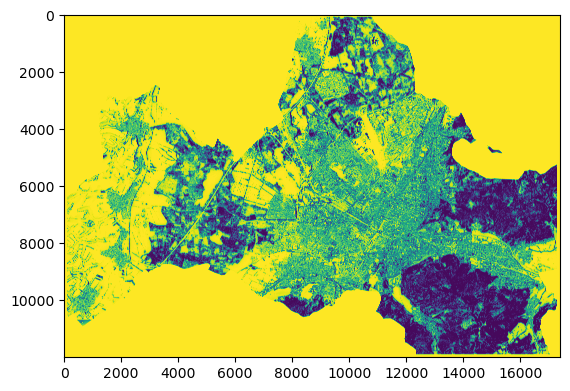

<Axes: >

In [4]:
# read raster
with rasterio.open(skv_path) as src:
    print(src.profile)
    array = src.read(1)
    crs = src.crs

show(array)

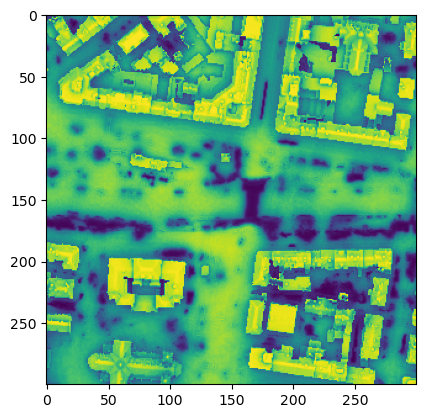

<Axes: >

In [11]:
# zoom into array

show(array[7700:8000, 11700:12000])

In [29]:
crs.to_epsg()

25832

In [30]:
stations_150 = stations_150.to_crs(crs.to_epsg())

In [31]:
stations_150.crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.01, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [59]:
from rasterstats import zonal_stats, point_query
stats = zonal_stats(stations_150, '/Users/lisawink/Documents/paper1/data/processed_data/SVF.tif', stats=['mean', 'max', 'min','count', 'std', 'median', 'sum', 'range','percentile_25','percentile_75'])

In [60]:
stations_150['SVF'] = stats

In [68]:
stats

[{'min': 0.010926200076937675,
  'max': 1.0,
  'mean': 0.6431029371269187,
  'count': 70360,
  'sum': 45248.72265625,
  'std': 0.24430098870935735,
  'median': 0.6907976865768433,
  'range': 0.9890737999230623,
  'percentile_25': 0.49866966903209686,
  'percentile_75': 0.8307029008865356},
 {'min': 0.01924601010978222,
  'max': 1.0,
  'mean': 0.5956139390553273,
  'count': 70363,
  'sum': 41909.18359375,
  'std': 0.25040802750938124,
  'median': 0.6323543190956116,
  'range': 0.9807539898902178,
  'percentile_25': 0.440192386507988,
  'percentile_75': 0.7718173563480377},
 {'min': 0.018706126138567924,
  'max': 1.0,
  'mean': 0.766606461759021,
  'count': 70363,
  'sum': 53940.73046875,
  'std': 0.2342271344967315,
  'median': 0.8304633498191833,
  'range': 0.9812938738614321,
  'percentile_25': 0.6482205986976624,
  'percentile_75': 0.9675578474998474},
 {'min': 0.02710702456533909,
  'max': 0.9986023306846619,
  'mean': 0.7547722943969071,
  'count': 70354,
  'sum': 53101.25,
  'std'

In [67]:
stations_150

station_id  station_no                       station_name  \
0      FRASHA           1           Freiburg Alte Stadthalle   
1      FRBETZ           2              Freiburg Betzenhausen   
2      FRBRUH           3                    Freiburg Bruehl   
3      FRDIET           4                Freiburg Dietenbach   
4      FRDREI           5                   Freiburg Dreisam   
5      FREBNE           6                     Freiburg Ebnet   
6      FREICH           7                  Freiburg Eichkopf   
7      FRFRIE           8             Freiburg Hauptfriedhof   
8      FRGART           9               Freiburg Gartenstadt   
9      FRGLBA          10                  Freiburg Glasbach   
10     FRGUNT          11               Freiburg Guenterstal   
11     FRHAID          12                      Freiburg Haid   
12     FRHBHF          13              Freiburg Hauptbahnhof   
13     FRHERD          14                   Freiburg Herdern   
14     FRHOCH          15                  Freiburg Hochdorf   
15     FRHOLZ          16                 Freiburg Holzmarkt   
16     FRIHOC          17  Freiburg Industriegebiet Hochdorf   
17     FRINST          18          Freiburg Institutsviertel   
18     FRKART          19            Freiburg Kartoffelmarkt   
19     FRLAND          20                Freiburg Landwasser   
20     FRLORE          21                   Freiburg Loretto   
21     FRMERZ          22                Freiburg Merzhausen   
22     FRMESS          23                     Freiburg Messe   
23     FROPFS          24              Freiburg Opfinger See   
24     FROWIE          25                Freiburg Oberwiehre   
25     FRPDAS          26  Freiburg Platz der Alten Synagoge   
26     FRRIES          27                Freiburg Rieselfeld   
27     FRSEEP          28                   Freiburg Seepark   
28     FRSTGA          29               Freiburg Stadtgarten   
29     FRSTGE          30               Freiburg St. Georgen   
30     FRSTUH          31               Freiburg Stuehlinger   
31     FRTECH          32      Freiburg Technische Fakultaet   
32     FRTIEN          33                   Freiburg Tiengen   
33     FRUNIK          34               Freiburg Uniklinikum   
34     FRUWIE          35               Freiburg Unterwiehre   
35     FRVAUB          36                    Freiburg Vauban   
36     FRWAHS          37                  Freiburg Waldhaus   
37     FRWEIN          38                Freiburg Weingarten   
38     FRWILD          39                   Freiburg Wildtal   
39     FRWITT          40                   Freiburg Wittnau   
40     FRWSEE          41                   Freiburg Waldsee   
41     FRZAHR          42                Freiburg Zaehringen   

                                    station_long_name station_type  \
0           Station Freiburg Alte Stadthalle (FRASHA)       Tier_I   
1              Station Freiburg Betzenhausen (FRBETZ)      Tier_II   
2                    Station Freiburg Bruehl (FRBRUH)       Tier_I   
3                Station Freiburg Dietenbach (FRDIET)      Tier_II   
4                   Station Freiburg Dreisam (FRDREI)       Tier_I   
5                     Station Freiburg Ebnet (FREBNE)       Tier_I   
6                  Station Freiburg Eichkopf (FREICH)      Tier_II   
7             Station Freiburg Hauptfriedhof (FRFRIE)      Tier_II   
8               Station Freiburg Gartenstadt (FRGART)      Tier_II   
9                  Station Freiburg Glasbach (FRGLBA)      Tier_II   
10              Station Freiburg Guenterstal (FRGUNT)       Tier_I   
11                     Station Freiburg Haid (FRHAID)      Tier_II   
12             Station Freiburg Hauptbahnhof (FRHBHF)      Tier_II   
13                  Station Freiburg Herdern (FRHERD)       Tier_I   
14                 Station Freiburg Hochdorf (FRHOCH)      Tier_II   
15                Station Freiburg Holzmarkt (FRHOLZ)      Tier_II   
16  Station Freiburg Industriegebiet Hochdorf (FRI...      T

In [69]:
stations_150['SVF_mean'] = stations_150['SVF'].apply(lambda x: x['mean'])
stations_150['SVF_std'] = stations_150['SVF'].apply(lambda x: x['std'])
stations_150['SVF_median'] = stations_150['SVF'].apply(lambda x: x['median'])
stations_150['SVF_IQR'] = stations_150['SVF'].apply(lambda x: x['percentile_75']) - stations_150['SVF'].apply(lambda x: x['percentile_25'])

In [70]:
params = gpd.read_parquet('/Users/lisawink/Documents/paper1/data/processed_data/processed_station_params_150.parquet')

In [71]:
params

station_id  station_no                       station_name  \
0      FRASHA           1           Freiburg Alte Stadthalle   
1      FRBETZ           2              Freiburg Betzenhausen   
2      FRBRUH           3                    Freiburg Bruehl   
3      FRDIET           4                Freiburg Dietenbach   
4      FRDREI           5                   Freiburg Dreisam   
5      FRFRIE           8             Freiburg Hauptfriedhof   
6      FRGART           9               Freiburg Gartenstadt   
7      FRGLBA          10                  Freiburg Glasbach   
8      FRGUNT          11               Freiburg Guenterstal   
9      FRHAID          12                      Freiburg Haid   
10     FRHBHF          13              Freiburg Hauptbahnhof   
11     FRHERD          14                   Freiburg Herdern   
12     FRHOCH          15                  Freiburg Hochdorf   
13     FRHOLZ          16                 Freiburg Holzmarkt   
14     FRIHOC          17  Freiburg Industriegebiet Hochdorf   
15     FRINST          18          Freiburg Institutsviertel   
16     FRKART          19            Freiburg Kartoffelmarkt   
17     FRLAND          20                Freiburg Landwasser   
18     FRLORE          21                   Freiburg Loretto   
19     FRMERZ          22                Freiburg Merzhausen   
20     FRMESS          23                     Freiburg Messe   
21     FROWIE          25                Freiburg Oberwiehre   
22     FRPDAS          26  Freiburg Platz der Alten Synagoge   
23     FRRIES          27                Freiburg Rieselfeld   
24     FRSEEP          28                   Freiburg Seepark   
25     FRSTGA          29               Freiburg Stadtgarten   
26     FRSTGE          30               Freiburg St. Georgen   
27     FRSTUH          31               Freiburg Stuehlinger   
28     FRTECH          32      Freiburg Technische Fakultaet   
29     FRUNIK          34               Freiburg Uniklinikum   
30     FRUWIE          35               Freiburg Unterwiehre   
31     FRVAUB          36                    Freiburg Vauban   
32     FRWEIN          38                Freiburg Weingarten   
33     FRWILD          39                   Freiburg Wildtal   
34     FRWITT          40                   Freiburg Wittnau   
35     FRWSEE          41                   Freiburg Waldsee   
36     FRZAHR          42                Freiburg Zaehringen   

                                    station_long_name station_type  \
0           Station Freiburg Alte Stadthalle (FRASHA)       Tier_I   
1              Station Freiburg Betzenhausen (FRBETZ)      Tier_II   
2                    Station Freiburg Bruehl (FRBRUH)       Tier_I   
3                Station Freiburg Dietenbach (FRDIET)      Tier_II   
4                   Station Freiburg Dreisam (FRDREI)       Tier_I   
5             Station Freiburg Hauptfriedhof (FRFRIE)      Tier_II   
6               Station Freiburg Gartenstadt (FRGART)      Tier_II   
7                  Station Freiburg Glasbach (FRGLBA)      Tier_II   
8               Station Freiburg Guenterstal (FRGUNT)       Tier_I   
9                      Station Freiburg Haid (FRHAID)      Tier_II   
10             Station Freiburg Hauptbahnhof (FRHBHF)      Tier_II   
11                  Station Freiburg Herdern (FRHERD)       Tier_I   
12                 Station Freiburg Hochdorf (FRHOCH)      Tier_II   
13                Station Freiburg Holzmarkt (FRHOLZ)      Tier_II   
14  Station Freiburg Industriegebiet Hochdorf (FRI...      Tier_II   
15         Station Freiburg Institutsviertel (FRINST)      Tier_II   
16           Station Freiburg Kartoffelmarkt (FRKART)      Tier_II   
17               Station Freiburg Landwasser (FRLAND)       Tier_I   
18                  Station Freiburg Loretto (FRLORE)      Tier_II   
19               Station Freiburg Merzhausen (FRMERZ)       Tier_I   
20                    Station Freiburg Messe (FRMESS)      Tier_II   
21               Station Freib

In [73]:
params_svf = params.merge(stations_150[['station_id', 'SVF_mean', 'SVF_std', 'SVF_median', 'SVF_IQR']], on='station_id', how ='inner')

In [74]:
params_svf.to_parquet('/Users/lisawink/Documents/paper1/data/processed_data/processed_station_params_150_svf.parquet')